In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Bound system with low eccentricity: Sun and Earth
We want to study the most simple two-body bound system: the Sun and the Earth. 
- Plot of the orbital plane $(x,y)$
- Time-dependence of the velocity and derivation of the orbital period
- Orbital eccentricity and length of the axes
- Energy conservation, angular momentum conservation and effective potential

In [20]:
orbits = np.genfromtxt("sun_earth.plot.txt", delimiter = ' ', invalid_raise=False)
t = 7
step = 0.01
m1 = 1.0 #solar mass IU
m2 = 0.000003 #earth mass IU

## internal units conversions ##
au = 149597870.707 #km
v_se_units = 30. #km/s
t_se_units = au / (v_se_units * 3.154e+7) #years
E_se_units = 9e45 #erg
L_se_units = 9e52 #km m^2 s^-1

In [21]:
x_1 = np.zeros(shape = int(len(orbits)/2))
x_2 = np.zeros(shape = int(len(orbits)/2))
y_1 = np.zeros(shape = int(len(orbits)/2))
y_2 = np.zeros(shape = int(len(orbits)/2))

for i in range(int(len(orbits)/2)):
    x_1[i] = orbits[i*2][0]
    y_1[i] = orbits[i*2][1]
    x_2[i] = orbits[i*2 +1][0]
    y_2[i] = orbits[i*2 +1][1]

v_x_1 = np.zeros(shape = int(len(orbits)/2))
v_x_2 = np.zeros(shape = int(len(orbits)/2))
v_y_1 = np.zeros(shape = int(len(orbits)/2))
v_y_2 = np.zeros(shape = int(len(orbits)/2))

for i in range(int(len(orbits)/2)):
    v_x_1[i] = orbits[i*2][3]
    v_y_1[i] = orbits[i*2][4]
    v_x_2[i] = orbits[i*2 +1][3]
    v_y_2[i] = orbits[i*2 +1][4]

The year is approximately 6.06 days shorter than expected


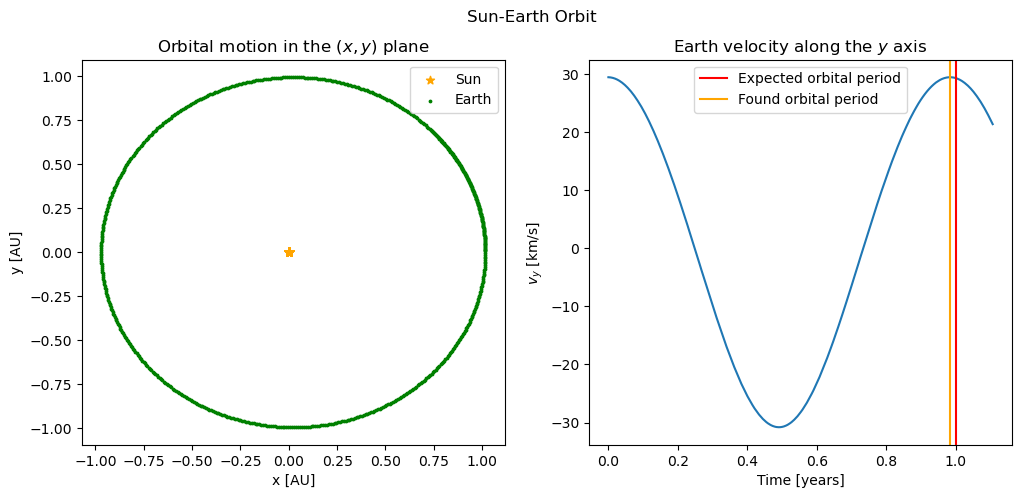

In [22]:
time = np.linspace(0, t*t_se_units, num=len(v_x_1))

maxi = []
for i in range (len(v_y_2)):
    if v_y_2[i] == v_y_2.max():
        maxi.append(i)
year = maxi[0] * step
actual_year = year * t_se_units
print('The year is approximately %.2f' % ((1 - actual_year)*365), 'days shorter than expected')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Sun-Earth Orbit')
ax1.scatter(x_1, y_1, color = 'orange', label = 'Sun', marker = '*')
ax1.scatter(x_2, y_2, color = 'green', s = 3, label = 'Earth')
ax1.set_xlabel('x [AU]')
ax1.set_ylabel('y [AU]')
ax1.set_title('Orbital motion in the $(x,y)$ plane')
ax1.legend()

ax2.plot(time, v_y_2*v_se_units)
ax2.axvline(1., label='Expected orbital period', color='red')
ax2.axvline(actual_year, label='Found orbital period', color='orange')
ax2.set_xlabel('Time [years]')
ax2.set_ylabel(r'$v_y$ [km/s]')
ax2.set_title('Earth velocity along the $y$ axis')
ax2.legend()

### Sun and Earth: orbital eccentricity and axes

In [23]:
peri = np.abs(x_2.min())
apo = np.abs(x_2.max())
peri_expected = 0.98329 #au
apo_expected = 1.0167

e = (apo - peri)/(apo + peri)
e_expected = 0.0167
print('Found eccentricity: %.4f' % e)
print('Expected eccentricity: %.4f' % e_expected)

Found eccentricity: 0.0233
Expected eccentricity: 0.0167


In [24]:
semimajor = (apo + peri)/2 
semimajor_expected = au / au
semiminor = np.sqrt(apo*peri)
semiminor_expected = 0.99986 #au

print('Found semimajor and semiminor axes [AU]: %.4f' % semimajor, ', %.4f' % semiminor)
print('Expected semimajor and semiminor axes [AU]: %.4f' % semimajor_expected, ', %.4f' % semiminor_expected)

Found semimajor and semiminor axes [AU]: 0.9939 , 0.9936
Expected semimajor and semiminor axes [AU]: 1.0000 , 0.9999


### Sun and Earth: energy conservation

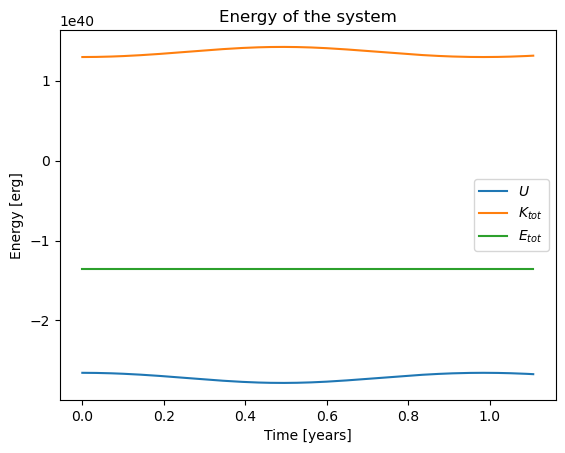

In [25]:
k1 = 0.5 * m1 * ((v_x_1)**2 + (v_y_1)**2)
k2 = 0.5 * m2 * ((v_x_2)**2 + (v_y_2)**2)
k_tot = k1 + k2

r = np.sqrt((x_1 - x_2)**2 + (y_1 - y_2)**2)
U = - (m1 * m2) / r
E_tot = k_tot + U

plt.plot(time, U*E_se_units, label='$U$')
plt.plot(time, k_tot*E_se_units, label='$K_{tot}$')
plt.plot(time, E_tot*E_se_units, label='$E_{tot}$')
plt.xlabel('Time [years]')
plt.ylabel('Energy [erg]')
plt.title('Energy of the system')
plt.legend()

### Sun and Earth: angular momentum conservation and effective potential

Effective Potential: 
$$ V_{eff}(\bf r) = \frac{L^2}{2\mu r^2} - \frac{m_{1}m_{2}}{r} $$

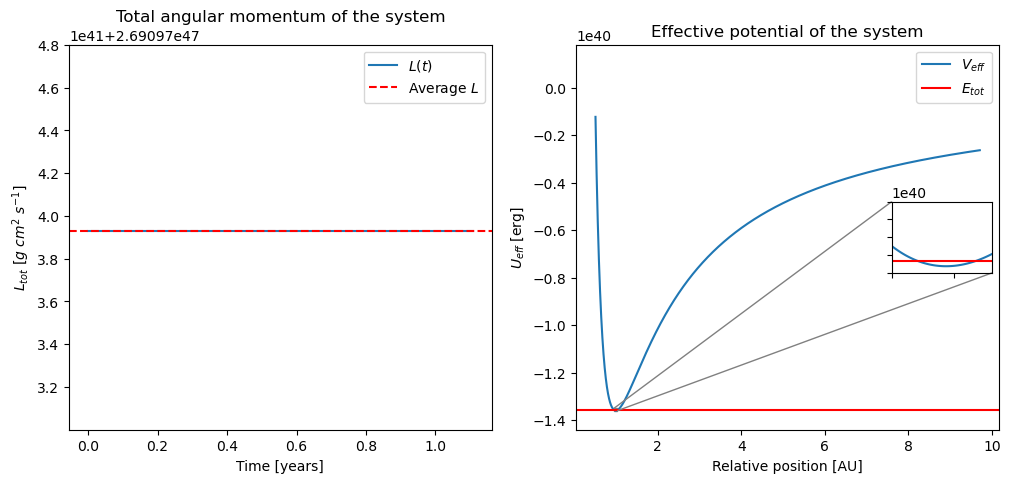

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


r0 = np.zeros((len(x_1), 2)) #vettore del coo del centro di massa
r0[:, 0] = x_1 - x_2 #relative distance vector
r0[:, 1] = y_1 - y_2

v0 = np.zeros((len(x_1), 2))
v0[:, 0] = v_x_1 - v_x_2 #relative velocity vector
v0[:, 1] = v_y_1 - v_y_2

mu_red = (m1*m2)/(m1+m2)
L_z_com = mu_red*(r0[:, 0]*v0[:, 1] - r0[:, 1]*v0[:, 0])

def V_eff(x):
    return (np.mean(L_z_com)**2)/(2*mu_red*x**2) - m1*m2/x

x_dense = np.linspace(0.5*apo, 10*peri, 10000)

fig2, (ax_am, ax_effpot) = plt.subplots(1,2, figsize=(12,5))
ax_am.plot(time, L_z_com*L_se_units, label='$L(t)$')
ax_am.set_ylim(2.989970e-6*L_se_units, 2.989972e-6*L_se_units)
ax_am.set_title('Total angular momentum of the system')
ax_am.axhline(np.mean(L_z_com*L_se_units), color='red', linestyle='dashed', label='Average $L$')
ax_am.set_ylabel('$L_{tot}$ [$g\ cm^2 \ s^{-1}$]')
ax_am.set_xlabel('Time [years]')
ax_am.legend()

ax_effpot.plot(x_dense, V_eff(x_dense)*E_se_units, label='$V_{eff}$')
ax_effpot.axhline(y=E_tot[0]*E_se_units, color='r', linestyle='-', label='$E_{tot}$')
ax_effpot.set_title('Effective potential of the system')
ax_effpot.set_ylabel('$U_{eff}$ [erg]')
ax_effpot.set_xlabel('Relative position [AU]')
ax_effpot.set_ylim(-1.6e-6*E_se_units, 0.2e-6*E_se_units)
ax_effpot.legend()

y1_zoom = -1.35E40
y2_zoom = -1.36E40
x1_zoom = 0.95
x2_zoom = 1.03

axins = zoomed_inset_axes(ax_effpot, 30, loc=7) # zoom = 30
axins.plot(x_dense, V_eff(x_dense)*E_se_units)
axins.axhline(y=E_tot[0]*E_se_units, color='r')
axins.set_xlim(x1_zoom, x2_zoom)
axins.set_ylim(y2_zoom, y1_zoom)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax_effpot, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()

## Bound system with high eccentricity: Sun and Halley's comet
We want to study the two-body bound system with a higher eccentricity: the Sun and Halley's comet. 
- Plot of the orbital plane $(x,y)$
- Time-dependence of the velocity and derivation of the orbital period
- Orbital eccentricity and length of the axes
- Energy conservation, angular momentum conservation and effective potential

In [37]:
orbits_h = np.genfromtxt("sun_halley.plot.txt", delimiter = ' ', invalid_raise=False)
t_h = 475
step_h = 0.1
m1_h = 1
m2_h = 1.1e-15

In [38]:
###saving the data in arrays###
x_1h = np.zeros(shape = int(len(orbits_h)/2))
x_2h = np.zeros(shape = int(len(orbits_h)/2))
y_1h = np.zeros(shape = int(len(orbits_h)/2))
y_2h = np.zeros(shape = int(len(orbits_h)/2))

for i in range(int(len(orbits_h)/2)):
    x_1h[i] = orbits_h[i*2][0]
    y_1h[i] = orbits_h[i*2][1]
    x_2h[i] = orbits_h[i*2 +1][0]
    y_2h[i] = orbits_h[i*2 +1][1]

v_x_1h = np.zeros(shape = int(len(orbits_h)/2))
v_x_2h = np.zeros(shape = int(len(orbits_h)/2))
v_y_1h = np.zeros(shape = int(len(orbits_h)/2))
v_y_2h = np.zeros(shape = int(len(orbits_h)/2))

for i in range(int(len(orbits_h)/2)):
    v_x_1h[i] = orbits_h[i*2][3]
    v_y_1h[i] = orbits_h[i*2][4]
    v_x_2h[i] = orbits_h[i*2 +1][3]
    v_y_2h[i] = orbits_h[i*2 +1][4]

The full orbit is approximately 27740.00 days shorter than expected


Text(0.5, 1.0, "Halley's comet velocity along the $y$ axis")

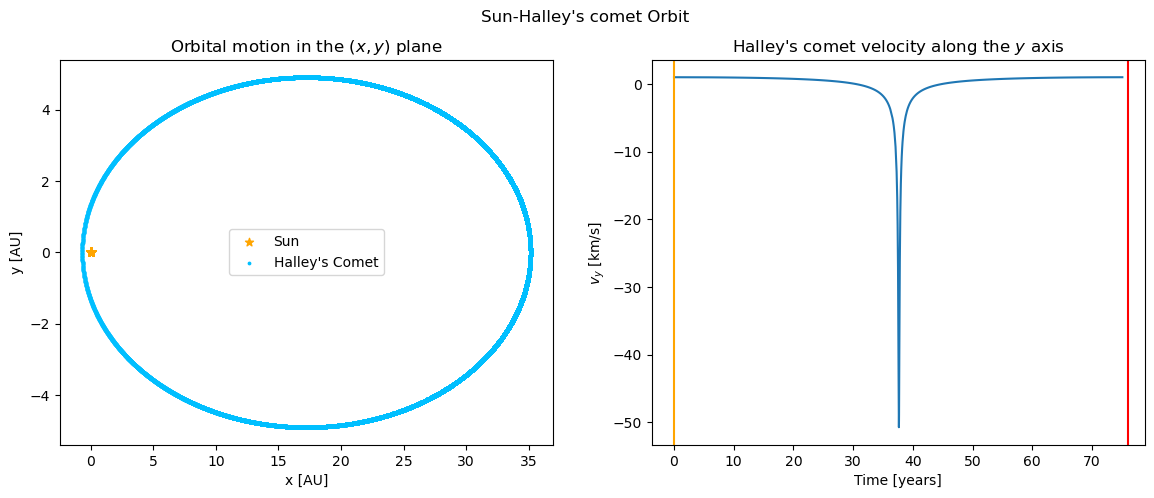

In [39]:
time_h = np.linspace(0, t_h*t_se_units, num=len(v_x_1h)) 

maxi_h = []
for i in range (len(v_y_2h)):
    if v_y_2h[i] == v_y_2h.max():
        maxi_h.append(i)
year_h = maxi_h[0] * step_h
actual_year_h = year_h * t_se_units
print('The full orbit is approximately %.2f' % ((76 - actual_year_h)*365) , 'days shorter than expected')

fig1, (ax1_h, ax2_h) = plt.subplots(1,2, figsize=(14,5))
fig1.suptitle("Sun-Halley's comet Orbit")
ax1_h.scatter(x_1h, y_1h, color = 'orange', marker = '*', label = 'Sun' )
ax1_h.scatter(x_2h, y_2h, color = 'deepskyblue', s = 3, label = "Halley's Comet")
ax1_h.legend()
ax1_h.set_xlabel('x [AU]')
ax1_h.set_ylabel('y [AU]')
ax1_h.set_title('Orbital motion in the $(x,y)$ plane')

ax2_h.plot(time_h, v_y_2h*v_se_units)
ax2_h.set_xlabel('Time [years]')
ax2_h.set_ylabel(r'$v_y$ [km/s]')
ax2_h.axvline(76., label='one expected full orbit', color='red')
ax2_h.axvline(actual_year_h, label='one actual full orbit', color='orange')
ax2_h.set_title("Halley's comet velocity along the $y$ axis")

### Sun and Halley's comet: eccentricity and axes

In [40]:
peri_h = np.abs(x_2h.min())
apo_h = np.abs(x_2h.max())

actual_apo_h = 35.14 #au
actual_peri_h = 0.59278 #au

e_h = (apo_h - peri_h)/(apo_h + peri_h)
actual_e_h = 0.96658
print('Found eccentricity: %.5f'% e_h)
print('Expected eccentricity: %.5f' % actual_e_h)

Found eccentricity: 0.96173
Expected eccentricity: 0.96658


In [41]:
semimajor_h = (apo_h + peri_h)/2 
actual_semimajor_h = (actual_apo_h + actual_peri_h)/2 
semiminor_h = np.sqrt(apo_h*peri_h)
actual_semiminor_h = np.sqrt(actual_apo_h*actual_peri_h) #au

print('Found semimajor and semiminor axes [AU]: %.4f' % semimajor_h, '%.4f' % semiminor_h)
print('Expected semimajor and semiminor axes [AU]: %.4f' % actual_semimajor_h, '%.4f' % actual_semiminor_h)

Found semimajor and semiminor axes [AU]: 17.9127 4.9079
Expected semimajor and semiminor axes [AU]: 17.8664 4.5640


### Sun and Halley's comet: energy conservation

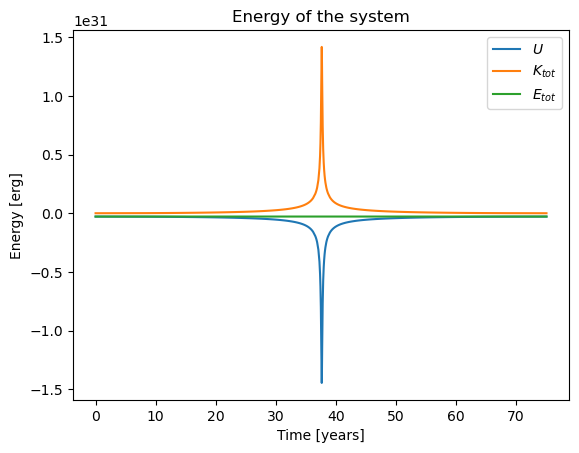

In [42]:
k1_h = 0.5 * m1_h * ((v_x_1h)**2 + (v_y_1h)**2)
k2_h = 0.5 * m2_h * ((v_x_2h)**2 + (v_y_2h)**2)

k_tot_h = k1_h + k2_h

r_h = np.sqrt((x_1h - x_2h)**2 + (y_1h - y_2h)**2)
U_h = - (m1_h * m2_h) / r_h
E_toth = k_tot_h + U_h

plt.plot(time_h, U_h*E_se_units, label='$U$')
plt.plot(time_h, k_tot_h*E_se_units, label='$K_{tot}$')
plt.plot(time_h, E_toth*E_se_units, label='$E_{tot}$')
plt.xlabel('Time [years]')
plt.ylabel('Energy [erg]')
plt.title('Energy of the system')
plt.legend()

### Sun and Halley's comet: angular momentum conservation and effective potential

Effective Potential: 
$$ V_{eff}(\bf r) = \frac{L^2}{2\mu r^2} - \frac{m_{1}m_{2}}{r} $$

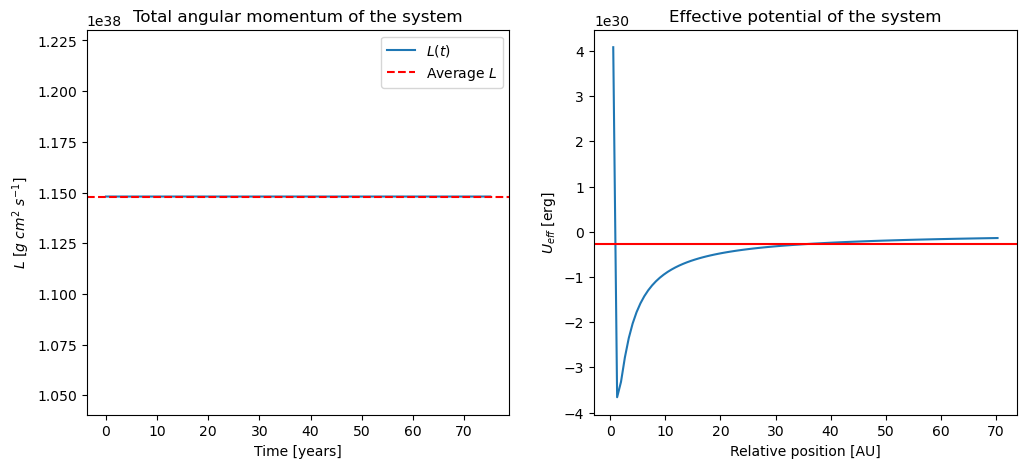

In [43]:
r0_h = np.zeros((len(x_1h), 2)) #vettore del coo del centro di massa
r0_h[:, 0] = x_1h - x_2h #relative motion vector
r0_h[:, 1] = y_1h - y_2h

v0_h = np.zeros((len(x_1h), 2))
v0_h[:, 0] = v_x_1h - v_x_2h #relative velocity vector
v0_h[:, 1] = v_y_1h - v_y_2h

mu_red_h = (m1_h*m2_h)/(m1_h+m2_h)
L_z_com_h = mu_red_h*(r0_h[:, 0]*v0_h[:, 1] - r0_h[:, 1]*v0_h[:, 0])

def V_eff_h(x):
    return (np.mean(L_z_com_h)**2)/(2*mu_red_h*x**2) - m1_h*m2_h/x

x_dense_h = np.linspace(2*apo_h, 0.8*peri_h, 100)

fig2_h, (ax_am_h, ax_effpot_h) = plt.subplots(1,2, figsize=(12,5))
ax_am_h.plot(time_h, L_z_com_h*L_se_units, label='$L(t)$')
ax_am_h.set_ylim(1.156e-15*L_se_units, 1.367e-15*L_se_units) #praticamente costante, varia sensibilmente dalla dodicesima cifra decimale
ax_am_h.set_title('Total angular momentum of the system')
ax_am_h.axhline(np.mean(L_z_com_h*L_se_units), label='Average $L$', color='red', linestyle='dashed')
ax_am_h.set_ylabel('$L$ [$g\ cm^2 \ s^{-1}$]')
ax_am_h.set_xlabel('Time [years]')
ax_am_h.legend()

ax_effpot_h.plot(x_dense_h, V_eff_h(x_dense_h)*E_se_units, label='$V_{eff}$')
ax_effpot_h.set_title('Effective potential of the system')
ax_effpot_h.set_ylabel('$U_{eff}$ [erg]')
ax_effpot_h.set_xlabel('Relative position [AU]')
ax_effpot.legend()

ax_effpot_h.axhline(y=E_toth[0]*E_se_units, color='r', linestyle='-', label='$E_{tot}$')



## Unbound system: comet with a hyperbolic orbit
We want to study a two-body highly unbound system: the Sun and a generic comet.
- Plot of the orbital plane $(x,y)$
- Orbital eccentricity

In [44]:
orbits_c= np.genfromtxt("sun_comet.plot.txt", delimiter = ' ', invalid_raise=False)

m1_c = 1 #solar masses
m2_c = 0.000003 #solar masses

(-129.1680603632546, 7.073873889888302, -82.41792355434858, 111.72362374530405)

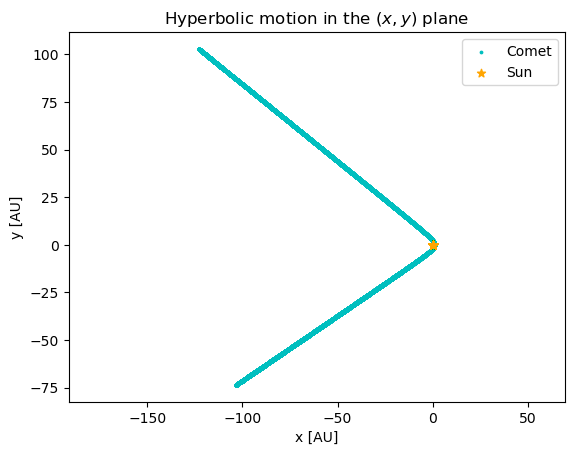

In [45]:
x_1c = np.zeros(shape = int(len(orbits_c)/2))
x_2c = np.zeros(shape = int(len(orbits_c)/2))
y_1c = np.zeros(shape = int(len(orbits_c)/2))
y_2c = np.zeros(shape = int(len(orbits_c)/2))

for i in range(int(len(orbits_c)/2)):
    x_1c[i] = orbits_c[i*2][0]
    y_1c[i] = orbits_c[i*2][1]
    x_2c[i] = orbits_c[i*2 +1][0]
    y_2c[i] = orbits_c[i*2 +1][1]

v_x_1c = np.zeros(shape = int(len(orbits_c)/2))
v_x_2c = np.zeros(shape = int(len(orbits_c)/2))
v_y_1c = np.zeros(shape = int(len(orbits_c)/2))
v_y_2c = np.zeros(shape = int(len(orbits_c)/2))

for i in range(int(len(orbits_c)/2)):
    v_x_1c[i] = orbits_c[i*2][3]
    v_y_1c[i] = orbits_c[i*2][4]
    v_x_2c[i] = orbits_c[i*2 +1][3]
    v_y_2c[i] = orbits_c[i*2 +1][4]

plt.scatter(x_2c, y_2c, color = 'c', s = 3, label = 'Comet')
plt.scatter(x_1c, y_1c, color = 'orange', label = 'Sun', marker = '*')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Hyperbolic motion in the $(x,y)$ plane')
plt.legend()
plt.axis('equal')

### Sun and comet: eccentricity for an unbound orbit

In [46]:
#eccentricity for an unbound orbit
mu_c = m1_c * m2_c /(m1_c + m2_c) #reduced mass
M_c = m1_c + m2_c #total mass
r = np.sqrt((x_1c[1000] - x_2c[1000])**2 + (y_1c[1000] - y_2c[1000])**2)

k1_c = 0.5 * m1_c * ((v_x_1c[1000])**2 + (v_y_1c[1000])**2)
k2_c = 0.5 * m2_c * ((v_x_2c[1000])**2 + (v_y_2c[1000])**2)
E_red = (k1_c + k2_c - m1_c*m2_c/r)/mu_c

#L_red = (m1_c*r*np.sqrt(((v_x_1c[1000])**2 + (v_y_1c[1000])**2)) + m2_c*r*np.sqrt(((v_x_2c[1000])**2 + (v_y_2c[1000])**2)))/mu_c #only on the x-axis
L_red = (x_1c[1000] - x_2c[1000])*(v_y_1c[1000]-v_y_2c[1000]) - (y_1c[1000] - y_2c[1000])*(v_x_1c[1000]-v_x_2c[1000])

e = np.sqrt(1+(2*E_red*(L_red)**2)/(M_c**2))
print('Found eccentricity: %.4f' % e)

Found eccentricity: 1.2460
